In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge

In [101]:
if os.path.split(os.getcwd())[-1] == 'notebooks': os.chdir(os.path.split(os.getcwd())[-2])
print(os.getcwd())

/home/fitzaudoen/apps/gas-sensor-analytics-demo


In [3]:
sns.set()
sns.set_context('talk')

In [4]:
df = pd.read_pickle('data/processed/train_data.pkl')

In [72]:
data = df.values
batch_id = data[:,0]
y = data[:,2]
X = data[:,3:]
cols = df.columns.values

In [73]:
scaler = pickle.load(
    open('models/preprocessing/scaler.pkl','rb')
)
pca = pickle.load(
    open('models/preprocessing/pca.pkl','rb')
)

In [74]:
X = scaler.transform(X)
X_pca = pca.transform(X)

In [75]:
encoder = OneHotEncoder(sparse=False)

In [76]:
X_cat = encoder.fit_transform(data[:,1:2])

In [77]:
X = np.concatenate((X,X_cat),axis=1)

In [78]:
cv_df = pd.read_pickle('data/processed/cv_data.pkl')

In [87]:
data_cv = cv_df.values
batch_id_cv = data_cv[:,0]
y_cv = data[:,2]
X_cv = scaler.transform(data[:,3:])
X_cv_pca = pca.transform(X_cv)
X_cv = np.concatenate((X_cv,X_cat),axis=1)
X_cv_pca = np.concatenate((X_cv_pca,X_cat),axis=1)

# Helper Functions

# Models without Reduction

In [97]:
def gen_learning_curve(regressor,X,y,X_cv,y_cv):
    n_arr = list(range(50,250,25)) + list(range(250,len(X),500))
    scores_learn = []
    scores_learn_cv = []
    for n in n_arr:
        reg = regressor.fit(X[0:n,:], y[0:n])
        scores_learn.append(reg.score(X[0:n,:],y[0:n]))
        scores_learn_cv.append(reg.score(X_cv,y_cv))
    return n_arr, scores_learn, scores_learn_cv



## Linear

In [88]:
reg = LinearRegression()

In [89]:
reg.fit(X,y)

LinearRegression()

In [90]:
reg.score(X,y)

0.8636129287455594

## Learning Curve

In [98]:
n_arr_lr, scores_learn_lr, scores_learn_lr_cv = gen_learning_curve(LinearRegression(), X, y, X_cv, y_cv)

(0.0, 1.0)

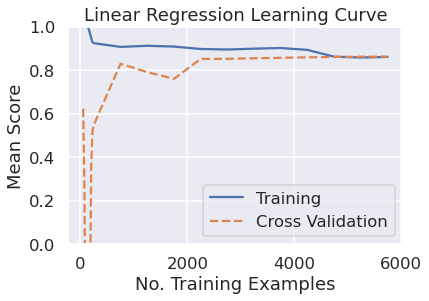

In [99]:
fig, ax = plt.subplots()
ax.plot(n_arr_lr,scores_learn_lr,label='Training')
ax.plot(n_arr_lr,scores_learn_lr_cv,'--',label='Cross Validation')
ax.set_title('Linear Regression Learning Curve')
ax.set_xlabel('No. Training Examples')
ax.set_ylabel('Mean Score')
ax.legend()
ax.set_ylim(0,1)

## Support Vector Regression

In [102]:
reg = SVR()
reg.fit(X,y)
reg.score(X,y)

0.6927493807046997

In [105]:
reg = SVR(C=5000)
reg.fit(X,y)
reg.score(X,y)

0.9426112926371736

## Random Forest Regression

In [111]:
reg = RandomForestRegressor()

In [112]:
reg.fit(X,y)
reg.score(X,y)

0.9887556447964589

In [113]:
n_arr_rf, scores_learn_rf, scores_learn_lr_rf = gen_learning_curve(RandomForestRegressor(), X, y, X_cv, y_cv)

(0.4, 1.0)

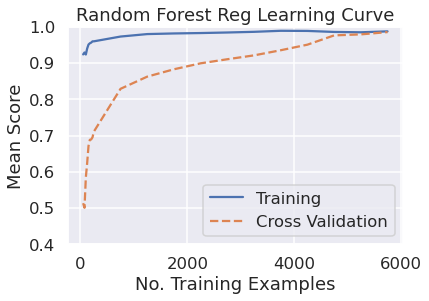

In [117]:
fig, ax = plt.subplots()
ax.plot(n_arr_rf,scores_learn_rf, label='Training')
ax.plot(n_arr_rf,scores_learn_lr_rf,'--', label='Cross Validation')
ax.set_title('Random Forest Reg Learning Curve')
ax.set_xlabel('No. Training Examples')
ax.set_ylabel('Mean Score')
ax.legend()
ax.set_ylim(.4,1)

## Lasso Regression

In [132]:
reg = BayesianRidge()

In [133]:
reg.fit(X,y)

BayesianRidge()

In [134]:
reg.score(X,y)

0.8621878072131293